<a href="https://colab.research.google.com/github/bdksma/machine-learning-w-python-FreeCodeCamp/blob/main/Optimizer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Neural Network


In [1]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist #load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #split into testing and training

4422102/4422102 [==============================] - 1s 0us/step


Lets have a look at this data to see what are working with

In [3]:
train_images.shape #we can got 60,000 images that are made up of 28 x 28 pixels (784 in total)

(60000, 28, 28)

In [4]:
train_images[0, 23, 23] #let's have look at one pixels

194

Our pixel value are between 0 and 255, 0 being black and 255 being white. This means we have a gray scale image as there are no colors channel

In [5]:
train_labels[:10] #lets have a look at first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our label are integers ranging 0 - 9. Each integer represents a spesific article of clothing. We'll create an array of label names to indicate which is which

In [6]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

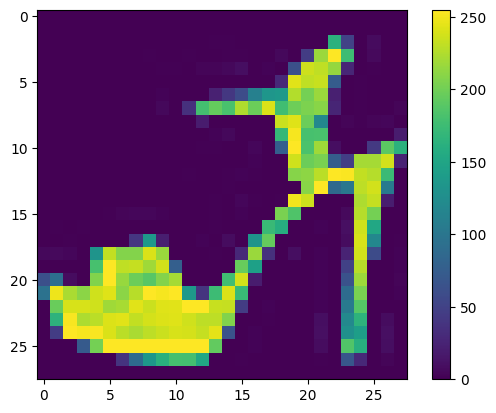

In [7]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preprocessing

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Building The Model

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer (1)
    keras.layers.Dense(128, activation='relu'), #hidden layer (2)
    keras.layers.Dense(10, activation='softmax') #output layer (3)
])

#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
#training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4991 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3731 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3357 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3115 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2926 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2793 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2683 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2570 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2457 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3691 - accuracy: 0.8745
Test Accuracy:  0.8744999766349792


Prediction

313/313 [==============================] - 1s 2ms/step
[1.7607538e-04 1.1892776e-06 6.6399662e-06 6.9607518e-07 1.2893607e-07
 9.9956769e-01 4.4591269e-07 2.3823089e-04 8.9062960e-06 3.6766370e-08]
5
Sandal


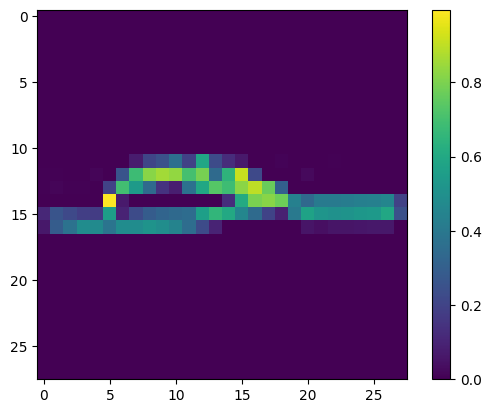

In [12]:
prediction = model.predict(test_images)
print(prediction[8]) #untuk melihat indeks class yang dimaksud
print(np.argmax(prediction[8]))
print(class_names[np.argmax(prediction[8])])
plt.figure()
plt.imshow(test_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

Verifying Prediction

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
def predict(model, image, correct_labels):
  class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
  prediction=model.predict(np.array[image])
  predicted_class=class_names[np.argmax(prediction)]
def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
      else:
        print("Try Again...")
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)